In [1]:
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

from dataloader import getVAE_DataLoader, IVSDataForVAE
from models import PredictiveEngine, LSTM, ArbFreeDNN, ConvVAE, getModels, graphIVS

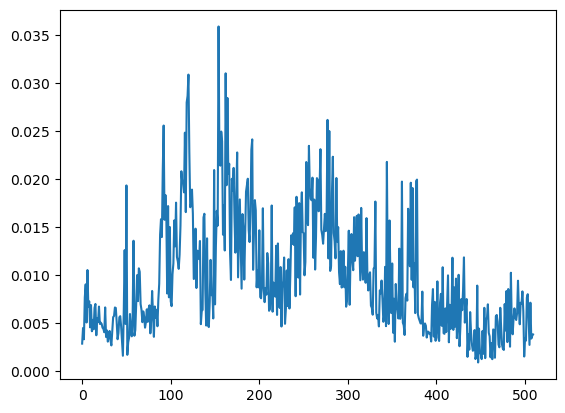

RMSE: 0.09448125879213291
Overall MDA: 0.5176794684816075 | ATM MDA: 0.5080610021786491
MAPE: 0.33991857583072843
CAL Score: 0.0 | BUT Score: 0.0


In [4]:
VAE, LSTM, DNN = getModels('8221203', '2030230', '3951028')
engine = PredictiveEngine(trained_LSTM=LSTM, trained_DNN=DNN, use_VAE=False, trained_VAE=VAE)
preds, targets, mse_chart, rmse_chart, mda_chart, mape_chart, cal_chart, but_chart = engine.validate(section='valid')

plt.plot(mse_chart)
plt.show()

print(f'RMSE: {sum(rmse_chart) / len(rmse_chart)}')

atm_mda = 0.0
overall_mda = 0.0
for time in mda_chart:
    atm_mda += (sum(time[4:7]) + sum(time[15:18]) + sum(time[26:29])) / 9
    overall_mda += sum(time) / len(time)
overall_mda = overall_mda / len(mda_chart)
atm_mda = atm_mda / len(mda_chart)
print(f'Overall MDA: {overall_mda} | ATM MDA: {atm_mda}')

mape_total = 0.0
for idx in mape_chart:
    mape_total += sum(idx) / len(idx)
print(f'MAPE: {mape_total / len(mape_chart)}')

print(f'CAL Score: {sum(cal_chart) / len(cal_chart)} | BUT Score: {sum(but_chart) / len(but_chart)}')

Target: 


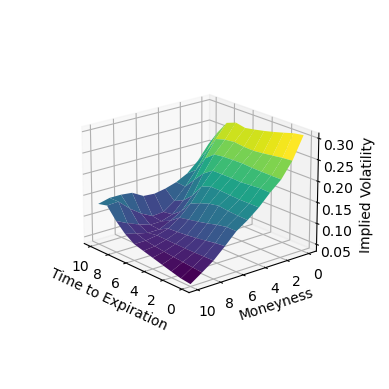

Output: 


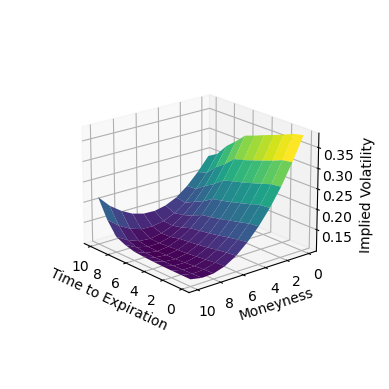

Target: 


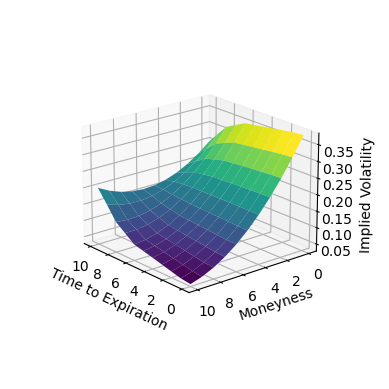

Diff: 


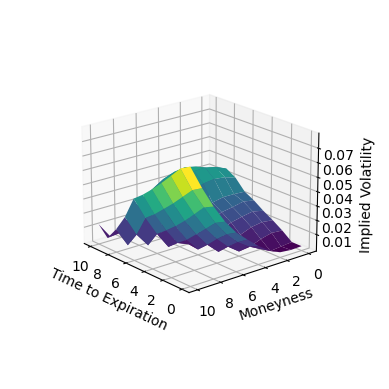

In [16]:
num = 12

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(targets[num-1].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Target: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(preds[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Output: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(targets[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Target: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = abs(pd.DataFrame(targets[num].reshape(11, 11)) - preds[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Diff: ')
plt.show()

In [3]:
import os

directory = '/scalers/'
filename = os.path.join(directory, f'{1234}.pkl')

In [4]:
filename

'/scalers/1234.pkl'

In [15]:
with open('scalers/example.pkl', 'rb') as file:
    pass

FileNotFoundError: [Errno 2] No such file or directory: 'scalers/example.pkl'